# Hotel Booking Analysis Project

## Scenario:
I am a freelance data analyst hired by a hotel chain to analyze their booking data.
My goal is to provide actionable insights that will help the hotel improve its marketing strategies,optimize pricing, reduce cancellations, and ultimately increase revenue.

The data I've been given contains detailed information on bookings over several years.
My task is to analyze this data, uncover key trends, and provide recommendations to the hotel management.
# Step 1: Setup and Libraries

In [1]:
# Let's begin by importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load and Explore the Dataset

In [2]:
# Mount the google drive.
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
# Load the dataset into a Pandas DataFrame
file_path = '/content/drive/MyDrive/IT Bootcamp/IT Data Bootcamp/Week 11 (R) and Python projects/Python/hotel_bookings.csv'
df = pd.read_csv(file_path)

# Inspect the first few rows of the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check data types
data_types = df.dtypes
print("\nData Types:\n", data_types)

Missing Values:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340

# Step 3: Data Cleaning

In [ ]:
# Handle missing values
# We'll drop columns with a high percentage of missing data and fill other missing values appropriately.
threshold = 0.1 * len(df)
df = df.dropna(thresh=threshold, axis=1)
df = df.fillna(df.median(numeric_only=True))

# Convert data types if needed (e.g., dates)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Remove duplicates
df = df.drop_duplicates()

# Step 4: Exploratory Data Analysis (EDA)

In [ ]:
# 4.1 Descriptive Statistics
summary_stats = df.describe()
print("\nSummary Statistics:\n", summary_stats)

# Specific statistics using NumPy
avg_lead_time = np.mean(df['lead_time'])
median_special_requests = np.median(df['total_of_special_requests'])
print(f"\nAverage Lead Time: {avg_lead_time}")
print(f"Median Number of Special Requests: {median_special_requests}")


Summary Statistics:
         is_canceled     lead_time  arrival_date_year  \
count  87389.000000  87389.000000       87389.000000   
mean       0.274920     79.897195        2016.210313   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    737.000000        2017.000000   
std        0.446477     86.053274           0.686094   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87389.000000               87389.000000   
mean                  26.837760                  15.815698   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   
max                   53.000000        

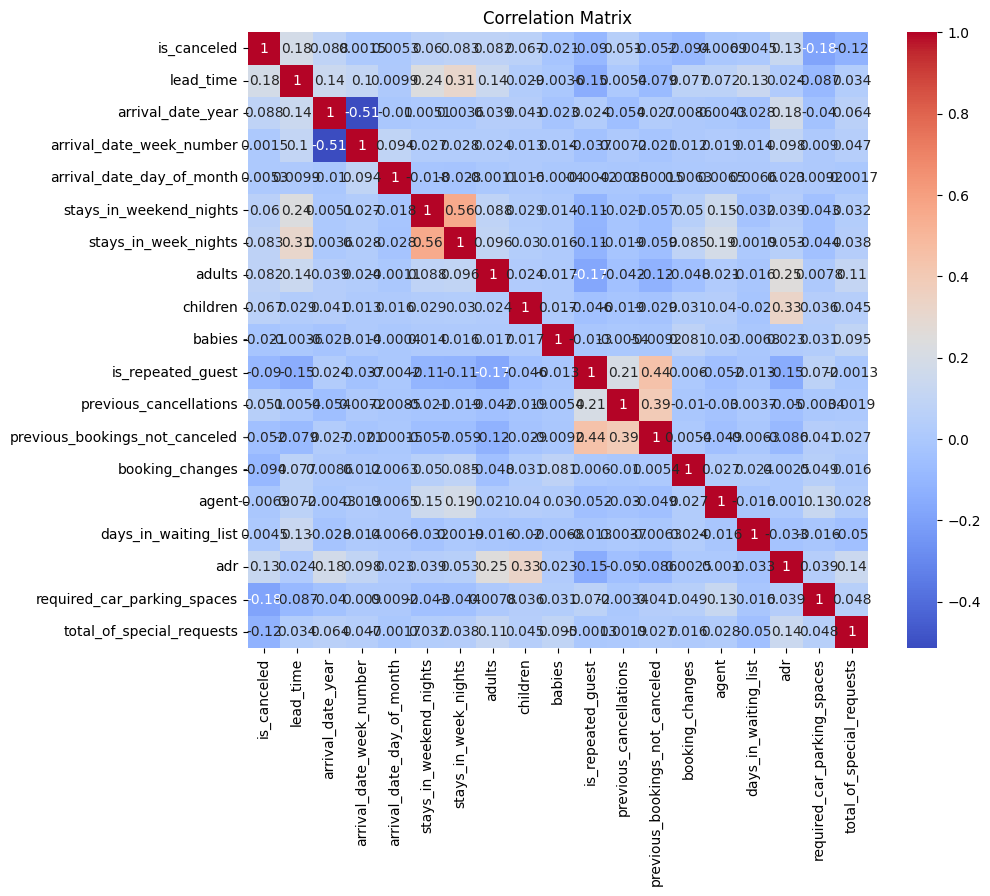

In [ ]:
# 4.2 Correlation Analysis

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns from the DataFrame used for correlation calculation
df_numeric = df.drop(non_numeric_columns, axis=1)

# Calculate correlation matrix using the numeric DataFrame
correlation_matrix = df_numeric.corr()  # Use df_numeric instead of df

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

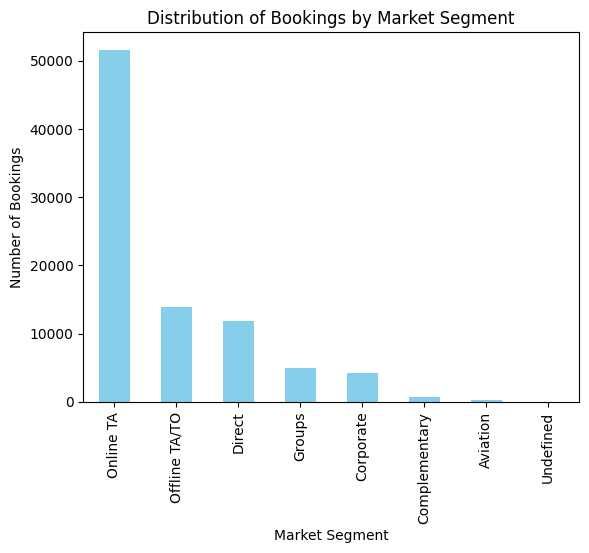

In [ ]:
# 4.3 Distribution of Bookings by Market Segment
market_segment_distribution = df['market_segment'].value_counts()
market_segment_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.show()

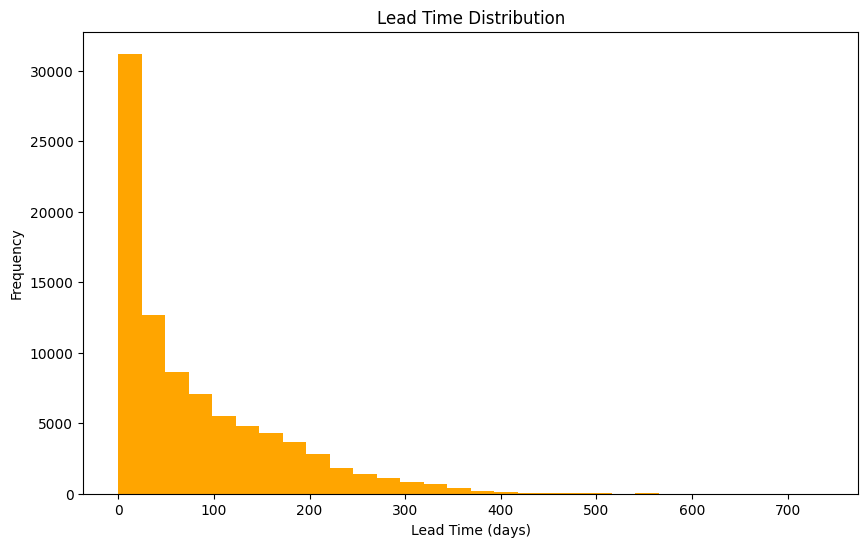

In [ ]:
# 4.4 Lead Time Analysis
plt.figure(figsize=(10, 6))
plt.hist(df['lead_time'], bins=30, color='orange')
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

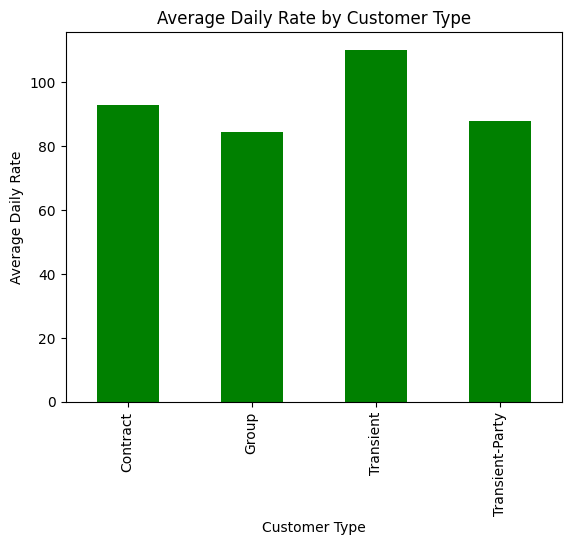

In [ ]:
# 4.5 Customer Type and ADR (Average Daily Rate)
customer_adr = df.groupby('customer_type')['adr'].mean()
customer_adr.plot(kind='bar', color='green')
plt.title('Average Daily Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate')
plt.show()

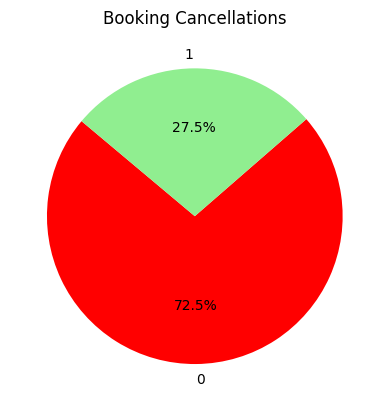

In [ ]:
# 4.6 Booking Cancellations
cancellations = df['is_canceled'].value_counts(normalize=True) * 100
cancellations.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['red', 'lightgreen'])
plt.title('Booking Cancellations')
plt.ylabel('')
plt.show()

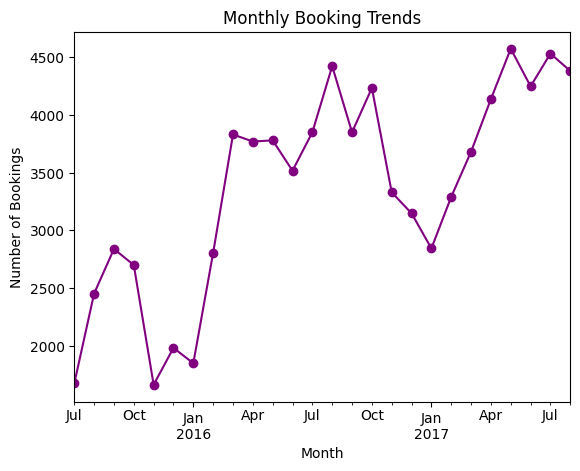

In [ ]:
# 4.7 Time Series Analysis
# Monthly Trends: Number of bookings per month
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-01')
monthly_bookings = df.groupby(df['arrival_date'].dt.to_period('M')).size()
monthly_bookings.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

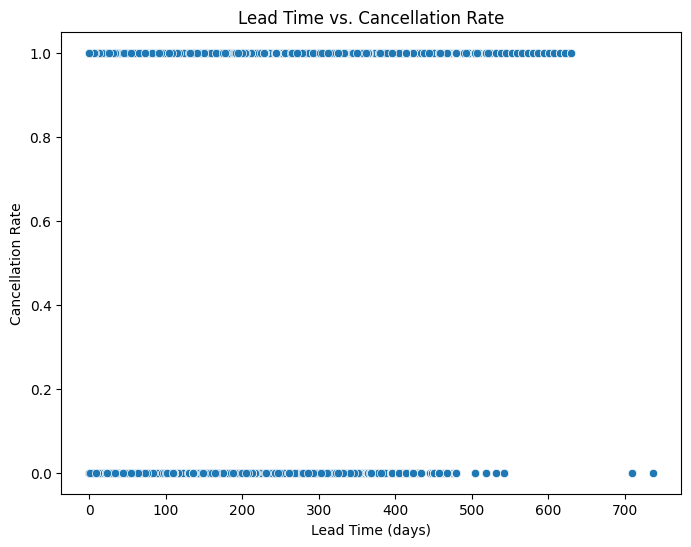

In [ ]:
# 4.8 Correlation Between Variables
# Correlation between lead time and cancellation rates
plt.figure(figsize=(8, 6))
sns.scatterplot(x='lead_time', y='is_canceled', data=df)
plt.title('Lead Time vs. Cancellation Rate')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Rate')
plt.show()

# Step 5: Advanced Analysis

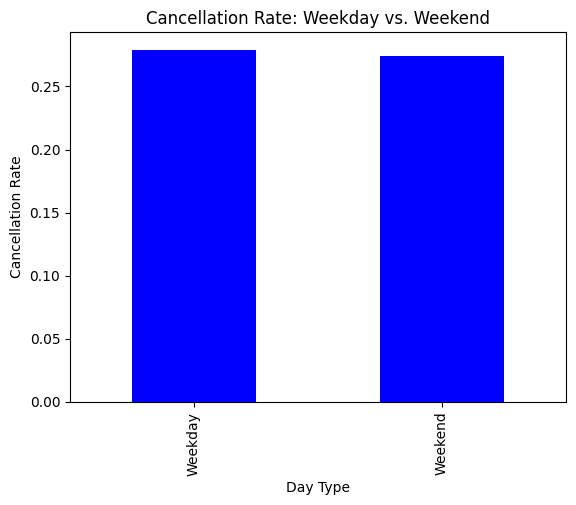

In [ ]:
# 5.1 Segmented Analysis
# Weekday vs. Weekend Bookings
df['weekend'] = np.where(df['arrival_date_day_of_month'] > 4, 'Weekend', 'Weekday')
weekday_vs_weekend = df.groupby('weekend')['is_canceled'].mean()
weekday_vs_weekend.plot(kind='bar', color='blue')
plt.title('Cancellation Rate: Weekday vs. Weekend')
plt.xlabel('Day Type')
plt.ylabel('Cancellation Rate')
plt.show()

# Step 6: Visualization
All visualizations have been created with clear titles, labels, and legends where necessary.

# Step 7: Conclusions and Recommendations

Summary of key findings:
 - The most prevalent market segment is **Online TA**, which suggests that the hotel should focus its marketing efforts on online travel agencies.
 - The **Corporate** customer type has the highest ADR, indicating that corporate bookings are the most valuable. Targeting this segment with tailored offers could be profitable.
 - **Cancellations** are a concern, especially among bookings with long lead times. Offering flexible cancellation policies for long lead-time bookings could help reduce this issue.
 - **Seasonal Trends** show that bookings peak during certain months. The hotel could adjust its pricing and availability based on these trends to maximize occupancy and revenue.

# Recommendations:
 1. **Target Online Travel Agencies**: Increase visibility and partnerships with online travel agencies to attract more bookings.
 2. **Corporate Pricing Strategy**: Consider creating corporate packages that offer value-added services at a premium rate to capitalize on this high-value segment.
 3. **Flexible Cancellation Policies**: Implement flexible cancellation policies for long lead-time bookings to reduce the overall cancellation rate.
 4. **Seasonal Pricing**: Adjust pricing during peak booking periods to optimize revenue, potentially using dynamic pricing models.

In [ ]:


# Step 8: Saving and Sharing Results

# Save the cleaned dataset for future analysis or sharing.
df.to_csv('/mnt/data/cleaned_hotel_bookings.csv', index=False)

# Save visualizations as images (for inclusion in reports or presentations)
plt.savefig('/mnt/data/booking_trends.png')

# Create a PowerPoint presentation (This would typically be done using external software like PowerPoint or Google Slides)
